In [18]:
import pandas as pd

In [19]:
df= pd.read_csv('loan_approval_dataset.csv')

In [20]:
print(df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [21]:
df=df.drop(['loan_id',' cibil_score'],axis=1)
print(df.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [22]:
print(df.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
       ' loan_status'],
      dtype='object')


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df[' education'] = label_encoder.fit_transform(df[' education'])  # Graduate=0, Not Graduate=1
df[' self_employed'] = label_encoder.fit_transform(df[' self_employed'])  # Yes=1, No=0
df[' loan_status'] = label_encoder.fit_transform(df[' loan_status'])  # Approved=0, Rejected=1

print(df.head())

   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          0              0       9600000     29900000   
1                 0          1              1       4100000     12200000   
2                 3          0              0       9100000     29700000   
3                 3          0              0       8200000     30700000   
4                 5          1              1       9800000     24200000   

   loan_term  residential_assets_value  commercial_assets_value  \
0         12                   2400000                 17600000   
1          8                   2700000                  2200000   
2         20                   7100000                  4500000   
3          8                  18200000                  3300000   
4         20                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  loan_status  
0             22700000           8000000            0  
1              8800000      

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[[' income_annum', ' loan_amount']] = scaler.fit_transform(df[[' income_annum', ' loan_amount']])


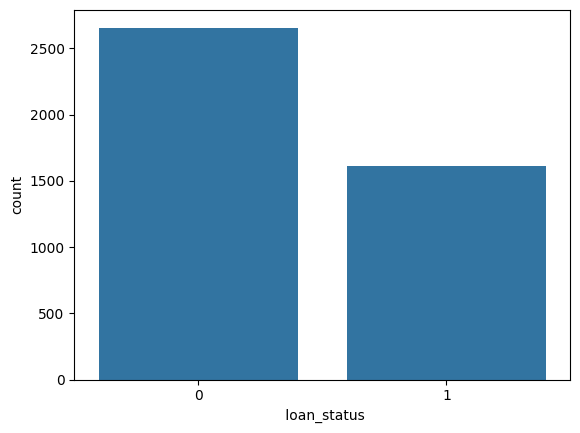

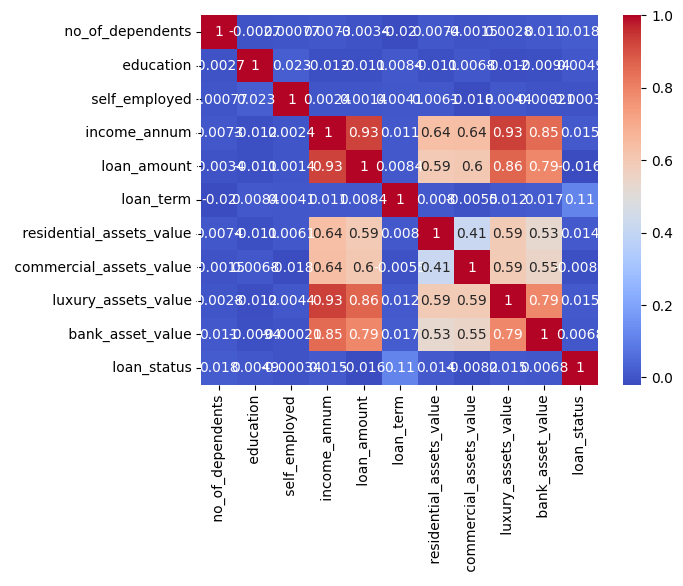

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=' loan_status', data=df)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [29]:
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy_gbc= accuracy_score(y_test, y_pred)
print(accuracy_gbc)

[[536   0]
 [318   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854

0.6276346604215457


C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

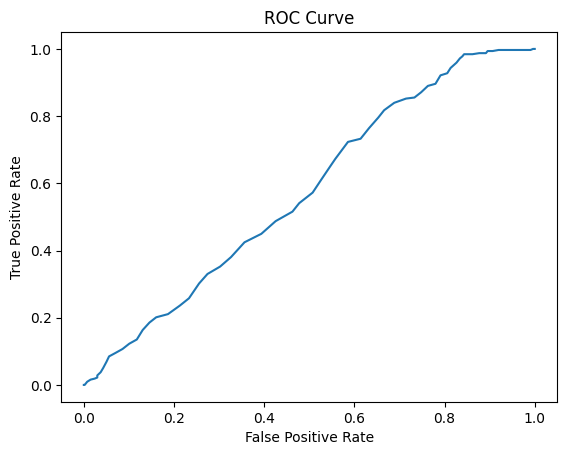

ROC-AUC Score: 0.5739316389749367


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


In [14]:
import pickle

with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

print("Model has been pickled successfully!")

Model has been pickled successfully!
